In [83]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime


In [2]:
data = pd.read_csv("Warehouse_and_Retail_Sales.csv")
data

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0
...,...,...,...,...,...,...,...,...,...
307640,2020,9,CROWN IMPORTS,99201,NEGRA MODELO 2/12 NR - 12OZ,BEER,29.00,38.0,575.0
307641,2020,9,DIAGEO NORTH AMERICA INC,99228,KALIBER BREW NA 4/6 NR - 12OZ,NON-ALCOHOL,6.50,8.0,35.0
307642,2020,9,MILLER BREWING COMPANY,99236,BLUE MOON HARVEST PUMPKIN WHEAT-NR,BEER,1.00,0.0,64.0
307643,2020,9,DOPS INC,99260,CHIMAY PREMIERE RED CAP 6/4NR - 11.2OZ,BEER,0.17,0.0,1.0


In [31]:
total = data.groupby(by=["YEAR"])['RETAIL SALES'].sum()+data.groupby(by=["YEAR"])['WAREHOUSE SALES'].sum()
total
# Per year total sales

YEAR
2017    3020583.70
2018     673122.09
2019    4503562.43
2020    1745387.43
dtype: float64

<Axes:xlabel='YEAR'>

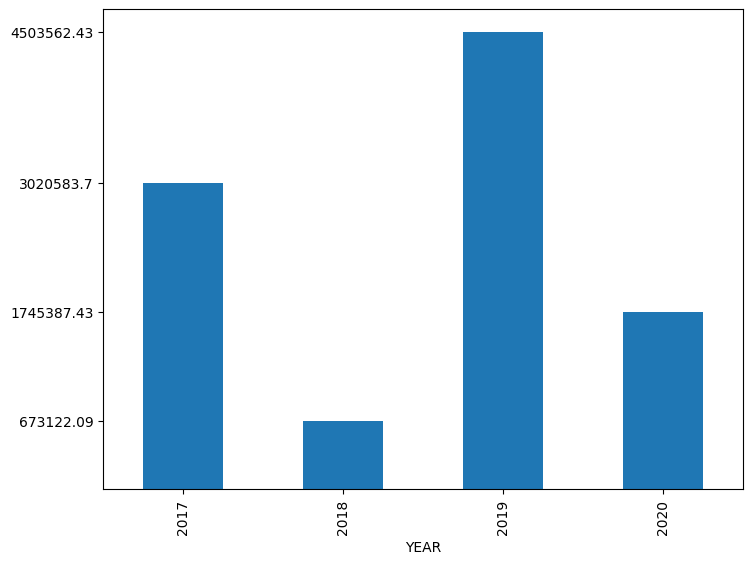

In [28]:
fig = plt.figure()
axes=fig.add_axes([0,0,1,1])
axes.set_yticks([3020583.70,673122.09,4503562.43,1745387.43]) 

axes.set_yticklabels([3020583.70,673122.09,4503562.43,1745387.43]) 

total.plot(kind='bar')

# Visualization of total sales per year

In [35]:
data['TOTAL SALES']=data['RETAIL SALES']+data['WAREHOUSE SALES']

In [60]:
top_5_suppliers = data.groupby(by=["SUPPLIER"])['TOTAL SALES'].sum()
top_5_suppliers=top_5_suppliers.sort_values(ascending=False).head(5)
print(top_5_suppliers)

# Determine top 5 suppliers based on total sales

SUPPLIER
CROWN IMPORTS             1736309.17
MILLER BREWING COMPANY    1512585.15
ANHEUSER BUSCH INC        1441131.66
HEINEKEN USA               885936.37
E & J GALLO WINERY         363634.31
Name: TOTAL SALES, dtype: float64


In [69]:
top_10_items = data.groupby(["ITEM CODE","ITEM DESCRIPTION","ITEM TYPE"])['TOTAL SALES'].sum()
top_10_items = top_10_items.sort_values(ascending=False).head(10)
print(top_10_items)
# top 10 best-selling items (based on total sales)

ITEM CODE  ITEM DESCRIPTION                    ITEM TYPE
23445      CORONA EXTRA LOOSE NR - 12OZ        BEER         328224.83
96750      CORONA EXTRA 2/12 NR - 12OZ         BEER         257679.62
23886      HEINEKEN LOOSE NR - 12OZ            BEER         189711.21
96970      HEINEKEN 2/12 NR - 12OZ             BEER         162224.15
90590      MILLER LITE 30PK CAN - 12OZ         BEER         148926.40
96741      CORONA EXTRA 4/6 NR - 12OZ          BEER         132665.61
25883      MODELO ESPECIAL 24 LOOSE NR - 12OZ  BEER         121846.80
90468      BUD LIGHT 30PK CAN                  BEER         108615.97
96083      HEINEKEN 4/6 NR - 12OZ              BEER         105184.92
23314      CORONA EXTRA 18PK NR - 12OZ         BEER         100664.44
Name: TOTAL SALES, dtype: float64


In [70]:
total_retail = data.groupby(by=["YEAR"])['RETAIL SALES'].sum()
avg_retail = total_retail/12
avg_retail
#average retail sales for each year

YEAR
2017    57227.880833
2018    12799.658333
2019    80015.933333
2020    30031.475000
Name: RETAIL SALES, dtype: float64

In [71]:
total_warehouse = data.groupby(by=["YEAR"])['WAREHOUSE SALES'].sum()
avg_warehouse = total_warehouse/12
avg_warehouse
#average warehouse sales for each year

YEAR
2017    194487.427500
2018     43293.849167
2019    295280.935833
2020    115417.477500
Name: WAREHOUSE SALES, dtype: float64

In [84]:
data['DATE'] = pd.to_datetime(data[['YEAR', 'MONTH']].assign(DAY=1))
data

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES,TOTAL SALES,DATE
13281,1970-01-01 00:00:00.000002020,1970-01-01 00:00:00.000000007,CROWN IMPORTS,23445,CORONA EXTRA LOOSE NR - 12OZ,BEER,1174.0,1041.0,18317.00,19491.00,2020-07-01
209265,1970-01-01 00:00:00.000002019,1970-01-01 00:00:00.000000005,CROWN IMPORTS,23445,CORONA EXTRA LOOSE NR - 12OZ,BEER,1373.0,1207.0,17703.62,19076.62,2019-05-01
234412,1970-01-01 00:00:00.000002019,1970-01-01 00:00:00.000000007,CROWN IMPORTS,23445,CORONA EXTRA LOOSE NR - 12OZ,BEER,1198.0,1416.0,17810.87,19008.87,2019-07-01
104143,1970-01-01 00:00:00.000002017,1970-01-01 00:00:00.000000011,CROWN IMPORTS,23445,CORONA EXTRA LOOSE NR - 12OZ,BEER,992.0,981.0,16079.12,17071.12,2017-11-01
63521,1970-01-01 00:00:00.000002017,1970-01-01 00:00:00.000000008,CROWN IMPORTS,23445,CORONA EXTRA LOOSE NR - 12OZ,BEER,990.0,1077.0,15346.71,16336.71,2017-08-01
...,...,...,...,...,...,...,...,...,...,...,...
89605,1970-01-01 00:00:00.000002017,1970-01-01 00:00:00.000000010,ANHEUSER BUSCH INC,175,EMPTY 1/2 KEG (30.00),DUNNAGE,0.0,0.0,-4996.00,-4996.00,2017-10-01
254206,1970-01-01 00:00:00.000002019,1970-01-01 00:00:00.000000008,NaN,600,ISTORE TRAINING OVERVIEW,REF,0.0,0.0,-7800.00,-7800.00,2019-08-01
18390,1970-01-01 00:00:00.000002020,1970-01-01 00:00:00.000000007,NaN,4,RMS ITEM,NON-ALCOHOL,NaN,0.0,0.00,NaN,2020-07-01
302867,1970-01-01 00:00:00.000002020,1970-01-01 00:00:00.000000009,NaN,4,RMS ITEM,NON-ALCOHOL,NaN,0.0,0.00,NaN,2020-09-01


Text(0.5, 1.0, 'Market')

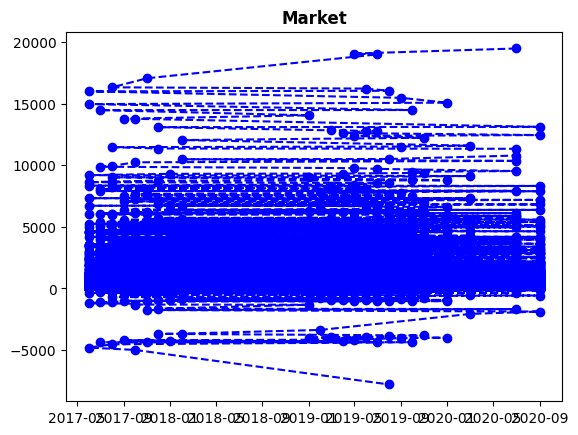

In [86]:
price_date = data['DATE']
price_sale = data['TOTAL SALES']

plt.plot_date(price_date, price_sale, linestyle='--', color='b')
plt.title('Market', fontweight="bold")

#seasonal trends in sales data.

In [76]:
sale_items = data.groupby(["ITEM CODE","ITEM DESCRIPTION","ITEM TYPE"])['TOTAL SALES'].sum()
sale_items

ITEM CODE  ITEM DESCRIPTION                         ITEM TYPE
100002     PATRON TEQUILA SILVER LTD - 1L           LIQUOR           0.17
100007     LA CETTO CAB SAUV - 750ML                WINE             4.00
100008     AMITY VINEYARDS P/NOIR 2013 - 750ML      WINE             3.00
100009     BOOTLEG RED - 750ML                      WINE            19.72
100011     PAPI P/GRIG - 1.5L                       WINE             3.00
                                                                   ...   
99988      SAM ADAMS HOPSCAPE 1/6 KG                KEGS            -1.00
99990      SAM ADAMS AMERICAN SMMR VARIETY 12PK NR  BEER           769.00
           SAM ADAMS SUMMER VARIETY 12PK NR         BEER          1679.16
BC         BEER CREDIT                              REF         -10651.00
WC         WINE CREDIT                              REF          -2048.00
Name: TOTAL SALES, Length: 35164, dtype: float64

In [77]:
sale_items = sale_items.sort_values(ascending=False).head(1)
print(sale_items)
#item type which contributes the most to overall sales.

ITEM CODE  ITEM DESCRIPTION              ITEM TYPE
23445      CORONA EXTRA LOOSE NR - 12OZ  BEER         328224.83
Name: TOTAL SALES, dtype: float64
